### I want to create a program to predict the emotion of a movie from imdb movie reviews.

The 6 common human emotions: Happiness, Sadness, Fear, Disgust, Anger, Surprise.

Steps:
1. Search for a movie, series, or series episode.
2. Scrap a specific number of user reviews for the search term.
3. Note the movie details, for example, genre, directors, actors, language, etc.
4. Create a program to analyze which emotions are prominent from the user reviews.
5. Display the prominent emotions in the movie, series, or series episode.

Links to help:
- https://www.geeksforgeeks.org/scrape-imdb-movie-rating-and-details-using-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# text cleaning packages
import neattext.functions as nfx
from textblob import TextBlob
import re

In [2]:
import imdb
ia = imdb.Cinemagoer()

In [3]:
movies = ia.search_movie('21 jump street')
for i,movie in enumerate(movies):
    if i == 10:
        break
    print(f'{i+1}. {movie}')

1. 21 Jump Street
2. 21 Jump Street
3. 21 Jump Street
4. 22 Jump Street
5. 21 Jump Street: Mime to Music
6. Bad Influence
7. Unfinished Business
8. Baby Blues
9. 21 Jump Street
10. 21 Jump Street


In [4]:
ia.get_movie_infoset()

['airing',
 'akas',
 'alternate versions',
 'awards',
 'connections',
 'crazy credits',
 'critic reviews',
 'episodes',
 'external reviews',
 'external sites',
 'faqs',
 'full credits',
 'goofs',
 'keywords',
 'list',
 'locations',
 'main',
 'misc sites',
 'news',
 'official sites',
 'parents guide',
 'photo sites',
 'plot',
 'quotes',
 'recommendations',
 'release dates',
 'release info',
 'reviews',
 'sound clips',
 'soundtrack',
 'synopsis',
 'taglines',
 'technical',
 'trivia',
 'tv schedule',
 'video clips',
 'vote details']

In [5]:
movies[0].movieID

'0092312'

In [6]:
print(f'{movies[0]}')

21 Jump Street


In [7]:
genre_list = []
for genre in ia.get_movie(movies[0].movieID)['genres']:
    print(genre)
    genre_list.append(genre)

Crime
Drama
Mystery


In [8]:
the_movie = ia.get_movie(movies[0].movieID, info=['reviews', 'plot'])
try:
    ia.update(the_movie, info=['episodes'])
except imdb.IMDbDataAccessError:
    pass

In [9]:
the_movie['plot'][0]

'The cases of an undercover police unit composed of young-looking officers specializing in youth crime.'

In [10]:
rating_list = []
review_title_list = []
review_list = []
reviews = the_movie['reviews']
for review in reviews:
    print(review)
    rating_list.append(review['rating'])
    review_title_list.append(review['title'])
    review_list.append(review['content'])
    print()

{'content': 'This was one of the first Fox hour-long dramas, and Fox definitely wore its heart on its sleeve. Like WB now, Fox wanted to lure in a teenage audience with its good-looking young stars. Luckily for those stars, 21 Jump Street was a rather good vehicle, and stood on its own merits.Kind of like a Mod Squad for the 80s, the "teens" in 21 Jump Street were cops. Hip cops. They would infiltrate schools, drug rings, gangs, wherever teenagers were in trouble... unlike the Mod Squad, though, the storylines were always passable, and quite often excellent. Almost every episode touched upon subjects that were taboo for the big 3 networks (and still are)- AIDS, statutory rape, drug use, abortion, child abuse- and presented it in a moralistic way, but without being maudlin.The show kind of faltered in its last few seasons; Johnny Depp was becoming a star, and execs started pushing other "stars" into the spotlight, hoping for cash rewards and spin-offs. Richard Greico was most heavily pr

In [11]:
the_movie['plot'][0]

'The cases of an undercover police unit composed of young-looking officers specializing in youth crime.'

In [12]:
try:
    episodes = list(the_movie['episodes'].items())
except KeyError:
    pass
# episodes[1]
else:
    print(f'\n{movies[0]} episodes-\n')
    for ep in episodes:
        a_list = list(ep[1].items())
        print('Season', ep[0], ':')
        for j, e in a_list:
            print(f'{j}. {e}')
        print()


21 Jump Street episodes-

Season 1 :
1. Pilot
2. America, What a Town
3. Don't Pet the Teacher
4. My Future's So Bright, I Gotta Wear Shades
5. The Worst Night of Your Life
6. Gotta Finish the Riff
7. Bad Influence
8. Blindsided
9. Next Generation
10. Low and Away
11. 16 Blown to 35
12. Mean Streets and Pastel Houses

Season 2 :
1. In the Custody of a Clown
2. Besieged: Part 1
3. Besieged: Part 2
4. Two for the Road
5. After School Special
6. Higher Education
7. Don't Stretch the Rainbow
8. Honor Bound
9. You Oughta Be in Prison
10. How Much Is That Body in the Window?
11. Christmas in Saigon
12. Fear and Loathing with Russell Buckins
13. A Big Disease with a Little Name
14. Chapel of Love
15. I'm Okay, You Need Work
16. Orpheus 3.3
17. Champagne High
18. Brother Hanson & the Miracle of Renner's Pond
19. Raising Marijuana
20. Best Years of Your Life
21. Cory and Dean Got Married
22. School's Out

Season 3 :
1. Fun with Animals
2. Slippin' Into Darkness
3. The Currency We Trade In
4. C

In [13]:
# load reviews in dataframe
df = pd.DataFrame(zip(review_title_list, review_list, rating_list), columns=['Review Title','Review', 'Rating'])
# preview
df

,Review Title,Review,Rating
0,Launching pad for teen stars; one of the bette...,This was one of the first Fox hour-long dramas...,NaN
1,The Mod Squad of the 80's,This was definitely a quality show. This show ...,NaN
2,Mod Squad Of The Eighties,"It took another 20 years, another generation, ...",8.0
3,Jump for Jump Street,This was Fox's first serious drama. It was aim...,8.0
4,reminder,This television series held its own. I remembe...,NaN
5,Show that Launched Johnny Depp Into Stardom,The show really was the Mod Squad of the 1980'...,8.0
6,One of the best shows of the 80's,I recently bought the first season and this sh...,NaN
7,Excellent series,This was a top notch series that featured yout...,9.0
8,terrific,"The movie that came out was good, but it could...",9.0
9,"Typical 1980s TV series, it gave Johnny Depp h...",Currently popular are the recent jump street m...,NaN


In [14]:
df.shape

(25, 3)

In [15]:
df.dtypes

Review Title     object
Review           object
Rating          float64
dtype: object

In [16]:
# check for missing values
df.isnull().sum()

Review Title     0
Review           0
Rating          13
dtype: int64

### Exploration with review text
- Sentiment Analysis
- Keyword Extraction
    - Keywords for each emotion
    - Wordcloud

In [17]:
def clean_text(text):
    """Clean Review Text."""
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    if type(text) == np.float:
        return ""
    temp = text.lower()
    temp = re.sub("'", "", temp)  # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+", "", temp)
    temp = re.sub("#[A-Za-z0-9_]+", "", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]', ' ', temp)
    temp = re.sub("[^a-z0-9]", " ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [18]:
def get_sentiment(sentiment):
    if sentiment < 0:
        return 'Negative'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Positive'

def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

In [19]:
df['Review Title'] = df['Review Title'].apply(clean_text)
df['Clean_Review'] = df['Review'].apply(clean_text)
df['Subjectivity'] = (df['Review Title'] + df['Clean_Review']).apply(get_subjectivity)
df['Polarity'] = (df['Review Title'] + df['Clean_Review']).apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment)
df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,Review Title,Review,Rating,Clean_Review,Subjectivity,Polarity,Sentiment
0,launching pad teen stars one better early fox ...,This was one of the first Fox hour-long dramas...,NaN,this was one first fox hour long dramas fox de...,0.422701,0.250287,Positive
1,mod squad 80s,This was definitely a quality show. This show ...,NaN,this was definitely quality show this show was...,0.519747,0.145758,Positive
2,mod squad eighties,"It took another 20 years, another generation, ...",8.0,it took another 20 years another generation be...,0.419887,0.147732,Positive
3,jump jump street,This was Fox's first serious drama. It was aim...,8.0,this was foxs first serious drama it was aimed...,0.456181,0.184965,Positive
4,reminder,This television series held its own. I remembe...,NaN,this television series held its own i remember...,0.522222,0.266667,Positive
5,show that launched johnny depp into stardom,The show really was the Mod Squad of the 1980'...,8.0,show really was mod squad 1980s kids that coul...,0.347500,0.131667,Positive
6,one best shows 80s,I recently bought the first season and this sh...,NaN,i recently bought first season this show is st...,0.512111,0.240667,Positive
7,excellent series,This was a top notch series that featured yout...,9.0,this was top notch series that featured youthf...,0.591429,0.465714,Positive
8,terrific,"The movie that came out was good, but it could...",9.0,movie that came out was good but it couldnt ho...,0.538750,0.261250,Positive
9,typical 1980s tv series it gave johnny depp hi...,Currently popular are the recent jump street m...,NaN,currently popular are recent jump street movie...,0.391745,0.096667,Positive


In [20]:
df['Sentiment'].mode()[0]

'Positive'

In [21]:
df['Sentiment'].value_counts()

Positive    22
Negative     3
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

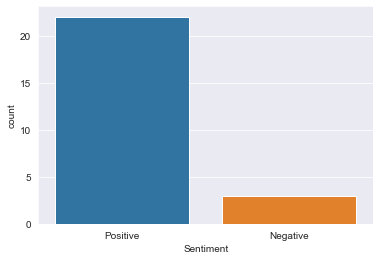

In [22]:
sns.countplot(x='Sentiment', data=df)

### Text Cleaning
- Remove noise
    - stopwords
    - special characters
    - punctuations
    - emojis

In [23]:
dir('nfx')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [24]:
df['Clean_Review'][0]

'this was one first fox hour long dramas fox definitely wore its heart its sleeve like wb now fox wanted lure teenage audience with its good looking young stars luckily those stars 21 jump street was rather good vehicle stood its own merits kind like mod squad 80s teens 21 jump street were cops hip cops they would infiltrate schools drug rings gangs wherever teenagers were trouble unlike mod squad though storylines were always passable quite often excellent almost every episode touched upon subjects that were taboo big 3 networks still are aids statutory rape drug use abortion child abuse presented it moralistic way but without being maudlin show kind faltered its last few seasons johnny depp was becoming star execs started pushing other stars into spotlight hoping cash rewards spin offs richard greico was most heavily promoted audience that didnt really care he became teen age heartthrob while but never achieved momentum carry his career skyward with this pushing stars storylines took

In [25]:
for i in range(0, df.shape[0]):
    print(df['Clean_Review'][i], '\n')

this was one first fox hour long dramas fox definitely wore its heart its sleeve like wb now fox wanted lure teenage audience with its good looking young stars luckily those stars 21 jump street was rather good vehicle stood its own merits kind like mod squad 80s teens 21 jump street were cops hip cops they would infiltrate schools drug rings gangs wherever teenagers were trouble unlike mod squad though storylines were always passable quite often excellent almost every episode touched upon subjects that were taboo big 3 networks still are aids statutory rape drug use abortion child abuse presented it moralistic way but without being maudlin show kind faltered its last few seasons johnny depp was becoming star execs started pushing other stars into spotlight hoping cash rewards spin offs richard greico was most heavily promoted audience that didnt really care he became teen age heartthrob while but never achieved momentum carry his career skyward with this pushing stars storylines took 

In [26]:
df

,Review Title,Review,Rating,Clean_Review,Subjectivity,Polarity,Sentiment
0,launching pad teen stars one better early fox ...,This was one of the first Fox hour-long dramas...,NaN,this was one first fox hour long dramas fox de...,0.422701,0.250287,Positive
1,mod squad 80s,This was definitely a quality show. This show ...,NaN,this was definitely quality show this show was...,0.519747,0.145758,Positive
2,mod squad eighties,"It took another 20 years, another generation, ...",8.0,it took another 20 years another generation be...,0.419887,0.147732,Positive
3,jump jump street,This was Fox's first serious drama. It was aim...,8.0,this was foxs first serious drama it was aimed...,0.456181,0.184965,Positive
4,reminder,This television series held its own. I remembe...,NaN,this television series held its own i remember...,0.522222,0.266667,Positive
5,show that launched johnny depp into stardom,The show really was the Mod Squad of the 1980'...,8.0,show really was mod squad 1980s kids that coul...,0.347500,0.131667,Positive
6,one best shows 80s,I recently bought the first season and this sh...,NaN,i recently bought first season this show is st...,0.512111,0.240667,Positive
7,excellent series,This was a top notch series that featured yout...,9.0,this was top notch series that featured youthf...,0.591429,0.465714,Positive
8,terrific,"The movie that came out was good, but it could...",9.0,movie that came out was good but it couldnt ho...,0.538750,0.261250,Positive
9,typical 1980s tv series it gave johnny depp hi...,Currently popular are the recent jump street m...,NaN,currently popular are recent jump street movie...,0.391745,0.096667,Positive


In [27]:
import nltk
import text2emotion as te

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>


In [28]:
df.shape[0]

25

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

# sorted emo_scale
df_emo = pd.Series()
for i in range(df.shape[0]):
    emo_scale = te.get_emotion(df['Review Title'][i] + df['Clean_Review'][i])
    emo_scale_sort = {k: v for k, v in sorted(emo_scale.items(), key=lambda item: item[1], reverse=True)}
    df_emo.loc[i] = emo_scale_sort

df['Emotion Scale'] = df_emo
df.head()

In [29]:
df['Emotion Scale'] = (df['Review Title'] + df['Clean_Review']).apply(te.get_emotion)

In [30]:
df['Emotion Scale']

0     {'Happy': 0.15, 'Angry': 0.09, 'Surprise': 0.1...
1     {'Happy': 0.17, 'Angry': 0.06, 'Surprise': 0.2...
2     {'Happy': 0.17, 'Angry': 0.07, 'Surprise': 0.3...
3     {'Happy': 0.12, 'Angry': 0.0, 'Surprise': 0.3,...
4     {'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.2...
5     {'Happy': 0.2, 'Angry': 0.07, 'Surprise': 0.2,...
6     {'Happy': 0.13, 'Angry': 0.0, 'Surprise': 0.39...
7     {'Happy': 0.19, 'Angry': 0.0, 'Surprise': 0.29...
8     {'Happy': 0.26, 'Angry': 0.0, 'Surprise': 0.26...
9     {'Happy': 0.04, 'Angry': 0.02, 'Surprise': 0.3...
10    {'Happy': 0.11, 'Angry': 0.15, 'Surprise': 0.2...
11    {'Happy': 0.2, 'Angry': 0.0, 'Surprise': 0.33,...
12    {'Happy': 0.16, 'Angry': 0.0, 'Surprise': 0.42...
13    {'Happy': 0.16, 'Angry': 0.03, 'Surprise': 0.3...
14    {'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.2...
15    {'Happy': 0.08, 'Angry': 0.0, 'Surprise': 0.08...
16    {'Happy': 0.44, 'Angry': 0.0, 'Surprise': 0.24...
17    {'Happy': 0.17, 'Angry': 0.08, 'Surprise':

In [31]:
df['Emotion Scale'][0].keys()

dict_keys(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'])

In [32]:
full_sum = 0
for this_zero in df['Emotion Scale']:
    # this_zero = df['Emotion Scale'][0]
    print(this_zero)
    sum_zero = sum(this_zero[k] for k in this_zero)
    print(sum_zero)
    the_sum = 0
    for i in this_zero:
        the_sum += this_zero[i]
    print(the_sum)
    full_sum += the_sum
full_sum /= df['Emotion Scale'].count()
print(full_sum)

{'Happy': 0.15, 'Angry': 0.09, 'Surprise': 0.17, 'Sad': 0.35, 'Fear': 0.24}
1.0
1.0
{'Happy': 0.17, 'Angry': 0.06, 'Surprise': 0.22, 'Sad': 0.22, 'Fear': 0.33}
1.0
1.0
{'Happy': 0.17, 'Angry': 0.07, 'Surprise': 0.33, 'Sad': 0.22, 'Fear': 0.2}
0.99
0.99
{'Happy': 0.12, 'Angry': 0.0, 'Surprise': 0.3, 'Sad': 0.27, 'Fear': 0.3}
0.99
0.99
{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.22, 'Sad': 0.22, 'Fear': 0.22}
0.99
0.99
{'Happy': 0.2, 'Angry': 0.07, 'Surprise': 0.2, 'Sad': 0.27, 'Fear': 0.27}
1.01
1.01
{'Happy': 0.13, 'Angry': 0.0, 'Surprise': 0.39, 'Sad': 0.17, 'Fear': 0.3}
0.99
0.99
{'Happy': 0.19, 'Angry': 0.0, 'Surprise': 0.29, 'Sad': 0.24, 'Fear': 0.29}
1.01
1.01
{'Happy': 0.26, 'Angry': 0.0, 'Surprise': 0.26, 'Sad': 0.11, 'Fear': 0.37}
1.0
1.0
{'Happy': 0.04, 'Angry': 0.02, 'Surprise': 0.35, 'Sad': 0.33, 'Fear': 0.26}
1.0
1.0
{'Happy': 0.11, 'Angry': 0.15, 'Surprise': 0.22, 'Sad': 0.3, 'Fear': 0.22}
1.0
1.0
{'Happy': 0.2, 'Angry': 0.0, 'Surprise': 0.33, 'Sad': 0.2, 'Fear': 0.27}
1.

In [33]:
base_dict = {k:0 for k in df['Emotion Scale'][0]}
for i in df['Emotion Scale']:
    # print(i)
    for k in i:
        #print(i[k])
        base_dict[k] += i[k]
tot_emo_dict = {k:round(base_dict[k]/df['Emotion Scale'].count(),4) for k in base_dict}
print(base_dict)
print(tot_emo_dict)

{'Happy': 3.96, 'Angry': 1.08, 'Surprise': 7.400000000000001, 'Sad': 6.219999999999999, 'Fear': 6.2700000000000005}
{'Happy': 0.1584, 'Angry': 0.0432, 'Surprise': 0.296, 'Sad': 0.2488, 'Fear': 0.2508}


### Keyword Extraction
    - extract most common words per class of emotion

In [34]:
from collections import Counter